In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
from matplotlib.colors import LogNorm

import timeit
#import Double_Null_utils as dnu
from scipy import optimize
import tables
import h5py



#import warnings
#warnings.filterwarnings("ignore")

start = timeit.default_timer()

In [2]:
uscal=100
vscal=100

In [3]:
rnputil=np.load('rnputil.npy')
wHD=rnputil[8]
print(wHD)

if wHD==True or wHD==1.0 or wHD=='True':
    urange=np.load('urange.npy')[::uscal]
    vrange=np.load('vrange.npy')[::vscal]
if wHD==False or wHD==0.0 or wHD==None or wHD=='False':
    urange=np.load('urange.npy')
    vrange=np.load('vrange.npy')


True


In [4]:
if wHD==True or wHD==1.0 or wHD=='True':
    with h5py.File('rnp.h5','r') as f:
        r_group_key = list(f.keys())[0]
        rnpi=f[r_group_key]
        rnp = np.asarray(rnpi[::uscal,::vscal])
    with h5py.File('signp.h5','r') as f:
        sig_group_key = list(f.keys())[0]
        signpi=f[sig_group_key]
        signp = np.asarray(signpi[::uscal,::vscal])
    with h5py.File('phinp.h5','r') as f:
        phi_group_key = list(f.keys())[0]
        phinpi=f[phi_group_key]
        phinp = np.asarray(phinpi[::uscal,::vscal])
    with h5py.File('massnp.h5','r') as f:
        mass_group_key = list(f.keys())[0]
        massnpi=f[mass_group_key]
        massnp = np.asarray(massnpi[::uscal,::vscal])
    
    print(str(rnp.nbytes)+" bytes")
    print("Hd5 files used")

if wHD==False or wHD==0.0 or wHD==None or wHD=='False':
    rnp=np.load('rnp.npy')
    signp=np.load('sig.npy')
    phinp=np.load('phi.npy')
    massnp=np.load('mass.npy')
    print("Numpy arrays used")

switchax=float(rnputil[9])
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    signp=np.swapaxes(signp,0,1)
    phinp=np.swapaxes(phinp,0,1)
    massnp=np.swapaxes(massnp,0,1)    
    


1616 bytes
Hd5 files used


In [5]:
print(rnputil)

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)


dv0=vrange[1]-vrange[0]

def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.687,1.3,50.0],args=(M0,Q,Lambda), method='hybr')
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
    
numpoints=Nu*Nv
print(str(numpoints)+" points")

if Q==0.0:
    predtime=numpoints/(144935)
if Q>0.0:
    predtime=numpoints/(259000)
print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")

['221386' '11' '20126' '2.0' '0.05' '1.0' '0.95' '0.1' 'True' '0.0' 'edd']
202 points
Runtime: about 0.00 minutes


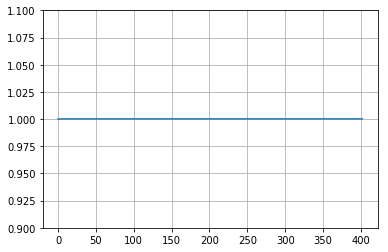

In [6]:
for line in massnp:
#for line in rnp[2500:3500]:
    plt.plot(vrange,line)
#plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
#plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
plt.ylim(.9,1.1)  
#plt.ylim(.687,.69)
#plt.yscale('log')
plt.grid()
plt.show()

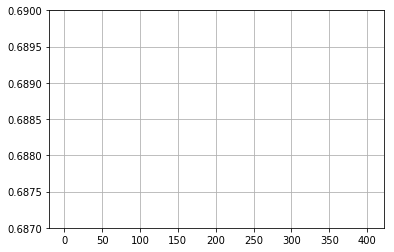

In [7]:
#for line in massnp[2900:3500]:
for line in rnp[2500:3500]:
    plt.plot(vrange,line)
#plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
#plt.ylim(.9,1.1)  
plt.ylim(.687,.69)
#plt.yscale('log')
plt.grid()
plt.show()

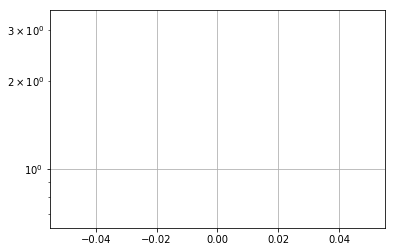

In [8]:
#for line in massnp[2900:3500]:
#for line in rnp[:][::100]:
for i in range(0,10):
    plt.plot(urange,rnp[:,i])
#plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
plt.plot([0,umax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r-')
plt.plot([0,umax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
#plt.ylim(.9,1.1)  
#plt.ylim(0,2)
#plt.ylim(.6875,.688)
#plt.ylim(.5,.9)
#plt.ylim(.6877460,.6877525)
#plt.xlim(1.83399,1.834005)
#plt.ylim(1.312,1.3124)
plt.yscale('log')
plt.grid()
plt.show()

In [9]:
print(len(rnp[:,1]))

1


In [10]:
massdiffnp=abs(massnp[:,:]-M0)
#print(massnp)
#print(np.nanmax(massdiffnp))
#print(signp)

In [11]:
print(Nv)
#print(vrange)

202


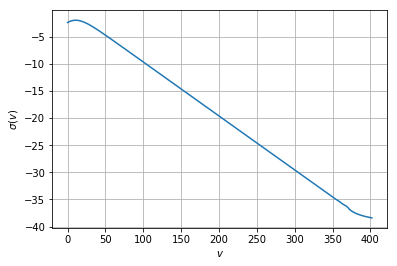

100.0 364.0
[-0.09227007  0.29116262]


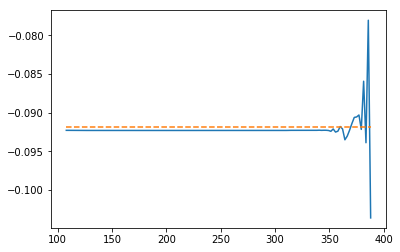

In [17]:
plt.plot(vrange,signp[0])
plt.ylabel(r"$\sigma(v)$")
plt.xlabel(r"$v$")
plt.grid()
#plt.savefig('num-rel-pics/sig_kc=-0.09227007_Mf=1.0_Q=.95_Lambda=0.1_N=50-10_edd.png',dpi=300)
plt.show()

v1=50
v2=Nv-20
print(vrange[v1],vrange[v2])

vmaxh=vmax
cornp=vmaxh/float(Nv)*np.full(Nv,1.0)*dr0v/0.5/np.abs(1-2*massnp[0][0]/rnp[0][0]+Q**2/rnp[0][0]**2-Lambda*(rnp[0][0])**2.0/3.0)
vrange2=np.cumsum(cornp)-cornp[0]

print(np.polyfit(vrange2[v1:v2],signp[0][v1:v2],1.0))

plt.plot(vrange2[v1:v2-1],np.diff(signp[0][v1:v2])/np.diff(vrange2[v1:v2]))
plt.plot([min(vrange2[v1:v2-1]),max(vrange2[v1:v2-1])],[-0.0918,-0.0918],'--',label=r'$\kappa_{c}$')
plt.show()

In [ ]:
plt.plot(vrange,rnp[0])
plt.ylabel(r"$\sigma(v)$")
plt.xlabel(r"$v$")
#plt.yscale('log')
plt.ylim(4.1275,4.1325)
plt.show()

In [ ]:
sig2np=np.zeros((Nu,Nv))
sigdiffnp=np.zeros((Nu,Nv))

sig2np[:,:]=np.log(1-2*M0/rnp[:,:]+Q**2/rnp[:,:]**2-Lambda*rnp[:,:]**2/3)

sigdiffnp[:,:]=np.abs(signp[:,:]-sig2np[:,:])

In [ ]:
plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(sigdiffnp),cmap=plt.cm.cool,norm=LogNorm(vmin=0.01, vmax=np.nanmax(sigdiffnp)))
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,20)
plt.ylim(0,umax)
plt.xlim(0,vmax)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Difference in Sigma vs (u,v) Coordinates (Eddington)')
#plt.savefig('EH-mismatch.png',dpi=300)
plt.show()

In [ ]:
print(sigdiffnp)
print(np.nanmax(sigdiffnp))

In [ ]:
def ce1checker(rnp,signp,i):
    checklist=np.empty((Nv-2))*np.nan
    for j in range(0,Nv-2):
        checklist[j]=1/dv0**2*(rnp[i][j+2]-2*rnp[i][j+1]+rnp[i][j]-(rnp[i][j+1]-rnp[i][j])*(signp[i][j+1]-signp[i][j]))
    return checklist
def ce2checker(rnp,signp,j):
    checklist=np.empty((Nu-2))*np.nan
    for i in range(0,Nu-2):
        checklist[i]=1/((urange[i+1]-urange[i])*(urange[i+2]-urange[i+1]))*((rnp[i+2][j]-2*rnp[i+1][j]+rnp[i][j])-(rnp[i+1][j]-rnp[i][j])*(signp[i+1][j]-signp[i][j]))
    return checklist


print(ce1checker(rnp,signp,3500))
print(np.nanmax(np.abs(ce1checker(rnp,signp,3500))))
print(ce2checker(rnp,signp,0))
print(np.nanmax(np.abs(ce2checker(rnp,signp,0))))

In [ ]:
u5=1000
v5=1200

du0=urange[u5+1]-urange[u5]
dv0=vrange[v5+1]-vrange[v5]
print(du0)
print(dv0)

rnpnew=np.array([[rnp[u5][v5],rnp[u5][v5+1]],[rnp[u5+1][v5],2]])
signpnew=np.array([[signp[u5][v5],signp[u5][v5+1]],[signp[u5+1][v5],2]])
phinpnew=np.array([[0,0],[0,0]])

print(rnpnew)
print(signpnew)

print(dnu.x4giveralt(0,0,du0,dv0,rnpnew,phinpnew,signpnew,1.0,.95,0.0,np.float64))
print(massnp[u5][v5])

In [ ]:
print(rnp[1][0])

In [ ]:
#u=1,v=1
M2=1.0000231
M3=1.0000002 
M4=1.0000119 #increase v res
M5=1.0000010 #increase u res
###############
#u=10,v=10
M2=1.0000229
M3=1.0000002
M4=1.0000139
M5=1.0000098